**AI+ PORT HACOURT WHATSAPP GROUP ANALYSIS**

##### This is the analysis of AI+ port hacourt whatsapp group chat which i'm a member of.
- This analysis is to find out key insights about the group chat which are:
- 1) The most active members of the group
- 2) The most used word by members of the group
- 3) Most active year in the group
- 4) frequently used emojis and lot more...

In [1]:
# Install emoji pack to able to analyze emoji
# !pip install emoji
# import regex

In [2]:
# Importing libraries
import re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

##### How i extract  data from WhatsApp for analysis


- Open WhatsApp
- Open the particular group i would like to analyze its chat
- Click on the hamburger icon (menu icon or 3 dots) at the top right
- Click on more
- Click export chat (i decide to include media or not) - for this analysis, there's no need of media.
- Select email
- Enter the destination email address (i can send it to yourself)
- Go to the mail to download the chat *only*.
- Saved it in my working directory

Although the data is ready to be used, we will need to change the date/time format to a more clear one

### Get date and time

In [3]:
def startsWithDateAndTime(s):
    """
    This is a function that detect whether each line 
    starts with a date as it states that it is a unique message
    """
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

### Get Authors(usernames)

In [4]:
# A function that extract the usernames in the chats as Authors
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

### Get data point

In [5]:
def getDataPoint(line):
    """
    This function separates all the information from each other so 
    that we could easily use the information as a 
    pandas dataframe
    """
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

### Getting the data

In [6]:
# A List to keep track of data so it can be used by a Pandas dataframe
data = [] 

# Name of your chat with .txt extension
conversation = "WhatsApp Chat with AI+ PH.txt" #Chat downloaded from mail, saved as WhatsApp Chat 1aa


with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = []
    parsedData = []
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

### Convert to pandas dataframe object

In [9]:
len(df.Author.unique())

48

In [8]:
# To pandas df
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.

# Convert date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

    
# Check the last few row
# df.tail(20)
df[['Date', 'Time', 'Message']].tail(20)


/usr/local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '25/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime

,Date,Time,Message
1795,2022-07-25,5:11 pm,Have you tried int(time)?
1796,2022-07-25,5:37 pm,import datetime time=datetime.now() int(time.s...
1797,2022-07-25,5:58 pm,<Media omitted>
1798,2022-07-25,6:25 pm,So then I'd have to convert the other time to ...
1799,2022-07-25,7:04 pm,"It depends on where you are applying it, you c..."
1800,2022-07-26,9:11 am,Good morning Sir(s) and Ma(s)👨🏻‍💻👩🏻‍💻🙂
1801,2022-07-26,9:13 am,Good morning sir 🙏🏻
1802,2022-07-26,9:13 am,"Meet one of us, 🌝Prof Tosin @2348136974156 , h..."
1803,2022-07-26,9:29 am,"Thank you for your kind words Sir, I am humbled"
1804,2022-07-26,10:15 am,Mr Tosin My facilitator that year.. DSN Port ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1815 non-null   datetime64[ns]
 1   Time     1815 non-null   object        
 2   Author   1653 non-null   object        
 3   Message  1815 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 56.8+ KB


In [ ]:
df.head()

,Date,Time,Author,Message,Year,Month,Day,urlcount
0,2020-11-02,9:53 pm,None,You were added,2020,November,2,0
1,2022-01-20,8:21 pm,None,"+234 905 508 2080: 📌📌 *Good evening all*, Plea...",2022,January,20,0
2,2022-01-20,8:22 pm,+234 810 445 4017,Can new members join? 🌚,2022,January,20,0
3,2022-01-20,8:23 pm,+234 816 013 0560,Sure.,2022,January,20,0
4,2022-01-20,8:26 pm,+234 810 445 4017,<Media omitted>,2022,January,20,0


In [ ]:
df.drop(['Author'], axis=1).head()

,Date,Time,Message,Year,Month,Day,urlcount
0,2020-11-02,9:53 pm,You were added,2020,November,2,0
1,2022-01-20,8:21 pm,"+234 905 508 2080: 📌📌 *Good evening all*, Plea...",2022,January,20,0
2,2022-01-20,8:22 pm,Can new members join? 🌚,2022,January,20,0
3,2022-01-20,8:23 pm,Sure.,2022,January,20,0
4,2022-01-20,8:26 pm,<Media omitted>,2022,January,20,0


In [ ]:
df.shape

(1815, 8)

In [ ]:
import datetime as dt

In [ ]:
# Generate Year colum
df['Year'] = df['Date'].dt.year

In [ ]:
# Generate Month colum 
df['Month'] = df['Date'].dt.month

In [ ]:
# Generate day colum 
df['Day'] = df['Date'].dt.day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1815 non-null   datetime64[ns]
 1   Time     1815 non-null   object        
 2   Author   1653 non-null   object        
 3   Message  1815 non-null   object        
 4   Year     1815 non-null   int64         
 5   Month    1815 non-null   int64         
 6   Day      1815 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 99.4+ KB


In [ ]:
df.head()

,Date,Time,Author,Message,Year,Month,Day,urlcount
0,2020-11-02,9:53 pm,None,You were added,2020,November,2,0
1,2022-01-20,8:21 pm,None,"+234 905 508 2080: 📌📌 *Good evening all*, Plea...",2022,January,20,0
2,2022-01-20,8:22 pm,+234 810 445 4017,Can new members join? 🌚,2022,January,20,0
3,2022-01-20,8:23 pm,+234 816 013 0560,Sure.,2022,January,20,0
4,2022-01-20,8:26 pm,+234 810 445 4017,<Media omitted>,2022,January,20,0


In [ ]:
df['Month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
                   10:'October', 11:'November', 12:'December'}, inplace=True)

In [ ]:
df.drop(['Author'], axis=1)

,Date,Time,Message,Year,Month,Day,urlcount
0,2020-11-02,9:53 pm,You were added,2020,November,2,0
1,2022-01-20,8:21 pm,"+234 905 508 2080: 📌📌 *Good evening all*, Plea...",2022,January,20,0
2,2022-01-20,8:22 pm,Can new members join? 🌚,2022,January,20,0
3,2022-01-20,8:23 pm,Sure.,2022,January,20,0
4,2022-01-20,8:26 pm,<Media omitted>,2022,January,20,0
...,...,...,...,...,...,...,...
1810,2022-07-26,11:08 am,*How can we help you?* let us know... We are o...,2022,July,26,0
1811,2022-07-26,11:44 am,If you have any serious person interested in j...,2022,July,26,0
1812,2022-07-26,11:51 am,Thank you very much,2022,July,26,0
1813,2022-07-26,11:52 am,Very soon I hope,2022,July,26,0


In [ ]:
df.Year.value_counts()

2022    1814
2020       1
Name: Year, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Chat count per year')

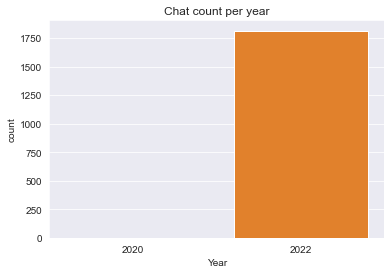

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid' )

sns.countplot(df.Year).set_title('Chat count per year')

There are more messages in 2022 than in 2020, that's obvious because we started an online quiz on whatsapp 2022

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Chart frequecy per Month VS Year')

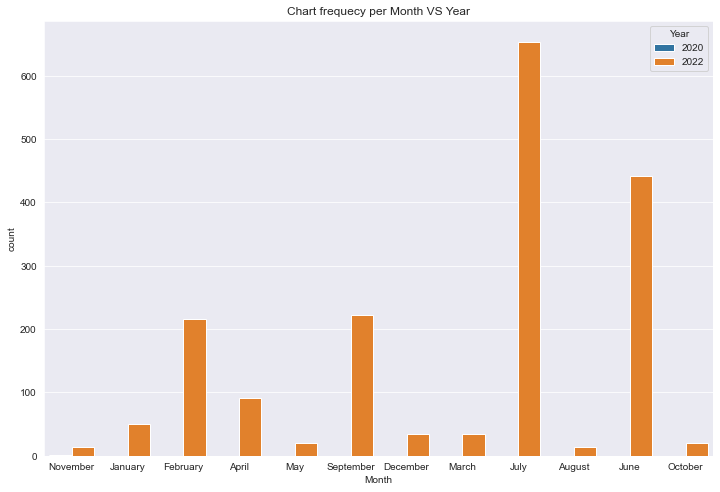

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df.Month, hue=df.Year).set_title('Chart frequecy per Month VS Year')

Most messages of 2022 are in October, then june 

In [ ]:
# Most active people on th group, those that chat most
df['Author'].value_counts().head(20)

+234 905 508 2080    618
Lukman Idris         216
Cyberholics          144
+234 703 839 7866    138
+234 810 164 4685     87
+234 803 454 7486     67
+234 816 013 0560     58
+234 813 419 0172     47
+234 814 041 4172     31
+234 813 338 8311     28
+234 814 257 8404     19
+234 903 992 6837     18
Anita DSN PH          16
+234 807 572 7886     14
Micheal Ph            12
+234 703 017 6676     12
Mr Abimbola           11
Adeyeye Seyi          11
+234 813 697 4156     11
+234 703 067 7833     10
Name: Author, dtype: int64

In [ ]:
# Ghost members who hadrly chat in the group
df['Author'].value_counts().tail(20)

+234 703 965 4166    5
+234 814 009 9900    5
+234 813 492 5452    4
+234 811 675 9346    3
+234 816 059 0910    2
+234 903 657 0339    2
+234 816 440 7874    2
+234 806 659 8204    2
+234 810 445 4017    2
+234 813 294 1110    1
+234 703 864 2087    1
+234 905 831 1197    1
+234 806 057 5550    1
Cyberholics:         1
+234 708 104 9593    1
+234 708 282 8150    1
+234 806 385 5966    1
+234 806 445 9813    1
+234 806 847 6408    1
+234 810 858 4073    1
Name: Author, dtype: int64

In [ ]:
df.drop(['Author'], axis=1).head()

,Date,Time,Message,Year,Month,Day
0,2020-11-02,9:53 pm,You were added,2020,November,2
1,2022-01-20,8:21 pm,"+234 905 508 2080: 📌📌 *Good evening all*, Plea...",2022,January,20
2,2022-01-20,8:22 pm,Can new members join? 🌚,2022,January,20
3,2022-01-20,8:23 pm,Sure.,2022,January,20
4,2022-01-20,8:26 pm,<Media omitted>,2022,January,20


In [ ]:
total_messages = df.shape[0]
print('Total messages in the group is: ', total_messages)

Total messages in the group is:  1815


In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print('Total media messages in the group is: ',  media_messages)

Total media messages in the group is:  79


In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:
links = np.sum(df.urlcount)

In [ ]:
print("My group")
print("Total messages in the group:",total_messages)
print("Total media in the group:",media_messages)
# print("Emojis:",emojis)
print("Toatl links in the group:",links)

My group
Total messages in the group: 1815
Total media in the group: 79
Toatl links in the group: 59


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [ ]:
messages_df = df.drop(media_messages_df.index)

In [ ]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1736 non-null   datetime64[ns]
 1   Time      1736 non-null   object        
 2   Author    1574 non-null   object        
 3   Message   1736 non-null   object        
 4   Year      1736 non-null   int64         
 5   Month     1736 non-null   object        
 6   Day       1736 non-null   int64         
 7   urlcount  1736 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 122.1+ KB


In [ ]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [ ]:
messages_df.drop(['Author'], axis=1).head()

,Date,Time,Message,Year,Month,Day,urlcount,Letter_Count,Word_Count,MessageCount
0,2020-11-02,9:53 pm,You were added,2020,November,2,0,14,3,1
1,2022-01-20,8:21 pm,"+234 905 508 2080: 📌📌 *Good evening all*, Plea...",2022,January,20,0,729,127,1
2,2022-01-20,8:22 pm,Can new members join? 🌚,2022,January,20,0,23,5,1
3,2022-01-20,8:23 pm,Sure.,2022,January,20,0,5,1,1
5,2022-01-20,8:55 pm,*PLEASE TREAT THIS AS IMPORTANT*📌,2022,January,20,0,33,5,1


In [ ]:
messages_df.Letter_Count.value_counts()

1       208
8        64
2        41
22       40
43       39
       ... 
0         1
215       1
1123      1
288       1
616       1
Name: Letter_Count, Length: 299, dtype: int64

### Word cloud

A word cloud, also known as a tag cloud or word art), is a simple visualization of data in which words are shown in varying sizes depending on how often they appear in text.

These are the most frequetly used words in the group 

There are 125817 words in all the messages.


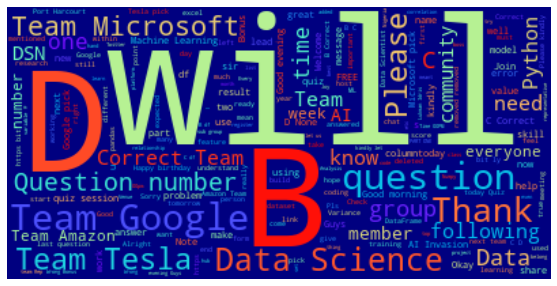

In [ ]:
text = " ".join(review for review in messages_df.Message)
print('These are the most frequetly used words in the group', '\n')

print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='navy', colormap='rainbow').generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here the most frequently used words can be seen vividly

<h1><center>Thank you for checking out my analysis!</h1></center>